In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from statsmodels.tsa.seasonal import seasonal_decompose
from wordcloud import WordCloud
# Load your CSV file
df = pd.read_excel(r"fds dst.xlsx",usecols = "A:E")
# Basic Preprocessing
# Ensure that 'timestamp' is in datetime format if it exists
df['timestamp'] = pd.to_datetime(df['Random Date'], format='%d-%m-%Y')
# Create additional features (e.g., comment length)
df['comment_length'] = df['Comments'].apply(len)


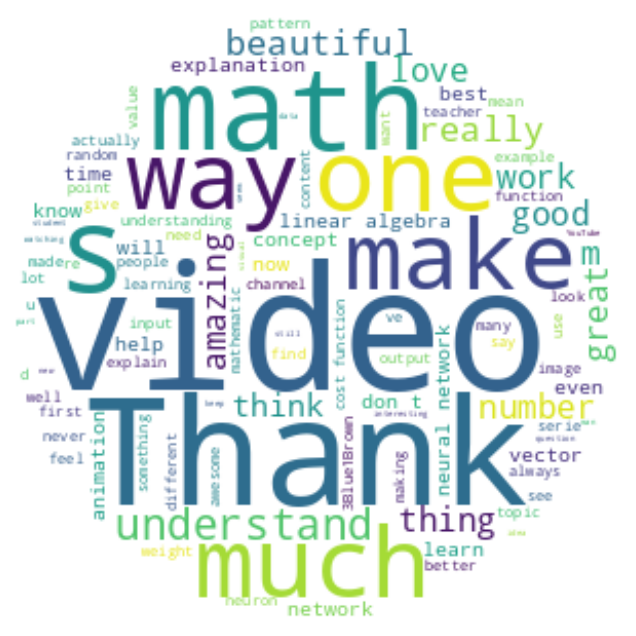

In [ ]:
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a circular mask
x, y = np.ogrid[:300, :300]  # Adjust size as needed
mask = (x - 150) ** 2 + (y - 150) ** 2 > 150 ** 2
mask = 255 * mask.astype(int)

# Combine comments into a single text
text = " ".join(comment for comment in df['Comments'])

# Generate the word cloud with the circular mask (without border)
wordcloud = WordCloud(max_words=100, background_color="white", mask=mask).generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


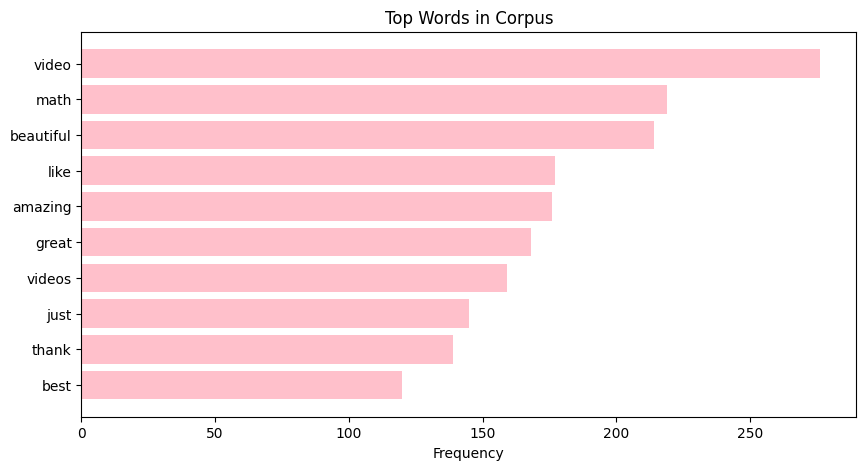

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import pairwise_distances
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
# Step 1: Load your data from CSV file
df = pd.read_excel('/content/fds dst.xlsx',nrows=1000)
# Assuming your comments are in a column named 'comments'
comments = df['Comments'].fillna('') # Replace 'comments' with your actual column name
# Step 2: Create a bag-of-words representation
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(comments)
# Step 3: Compute the distance matrix
distances = pairwise_distances(X.toarray(), metric='euclidean')
# --- Top Words Visualization ---
word_counts = X.toarray().sum(axis=0)
words = vectorizer.get_feature_names_out()
top_words = pd.DataFrame({'word': words, 'count': word_counts})
top_words = top_words.sort_values(by='count', ascending=False).head(10)
# Plot top words
plt.figure(figsize=(10, 5))
plt.barh(top_words['word'], top_words['count'], color='pink')
plt.xlabel('Frequency')
plt.title('Top Words in Corpus')
plt.gca().invert_yaxis() # Invert y-axis to have the highest frequency on top

plt.show()


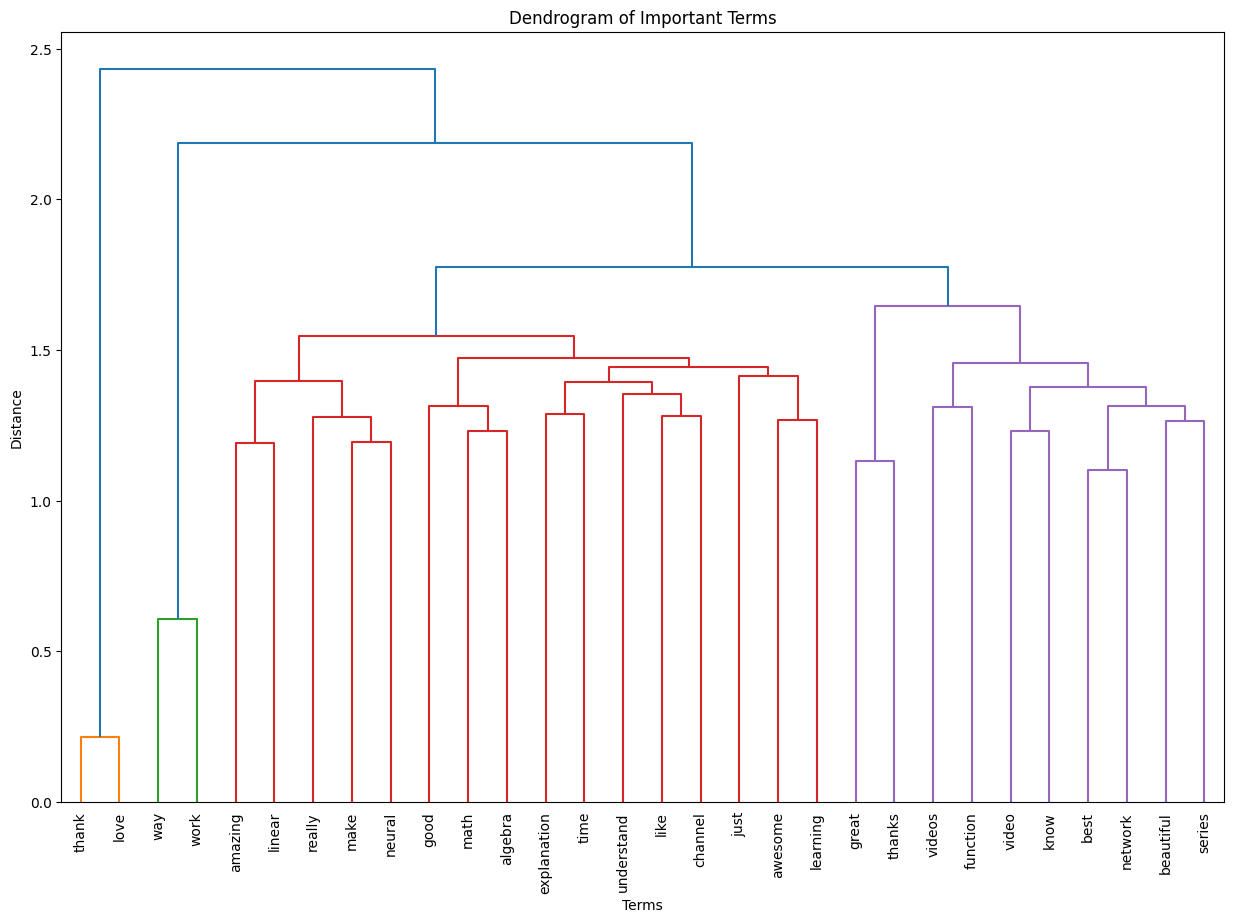

In [4]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# Load the CSV file (replace with your own file path)
df = pd.read_excel(r"fds dst.xlsx",usecols = "A:E")

# Ensure 'Review' column is string type
df['Comments'] = df['Comments'].astype(str)

# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer to your review data and transform it into a matrix
X = vectorizer.fit_transform(df['Comments'])

# Get feature names (terms)
terms = vectorizer.get_feature_names_out()

# Calculate TF-IDF scores
tfidf_scores = np.sum(X.toarray(), axis=0)

# Set the threshold and filter terms
threshold = 0.01
important_terms = [(term, score) for term, score in zip(terms, tfidf_scores) if score >= threshold]

# Sort the important terms by score and select top 30 terms
important_terms_sorted = sorted(important_terms, key=lambda x: x[1], reverse=True)[:30]

# Extract the top terms and their scores
top_terms, top_scores = zip(*important_terms_sorted)

# Create a new TF-IDF matrix with the important terms
important_X = X[:, np.where(tfidf_scores >= threshold)[0]][:, np.isin(terms, top_terms)]

# Calculate cosine similarity between the important terms
similarity = cosine_similarity(important_X.T)

# Create a linkage matrix for hierarchical clustering
linkage_matrix = linkage(similarity, method='ward')

# Create a dendrogram with the important terms
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix, labels=top_terms, leaf_rotation=90, leaf_font_size=10)
plt.title('Dendrogram of Important Terms')
plt.xlabel('Terms')
plt.ylabel('Distance')
plt.show()